## Regularized Linear Regression and Bias v.s. Variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as op

### 1 Regularized Linear Regression
- **1.1 Visualizing the dataset**
- **1.2 Regularized linear regression cost function**
- **1.3 Regularized linear regression gradient**
- **1.4 Fitting linear regression**

In [79]:
# Visualizing the dataset
# Training set: (X, y); Cross Validation set: (Xval, yval); Test set: (Xtest, ytest)
data = sio.loadmat("ex5data1.mat")
X = data['X']
y = data['y'].ravel()   # or y = data['y'].flatten() (copy)
Xval = data['Xval']
yval = data['yval'].ravel()
Xtest = data['Xtest']
ytest = data['ytest'].ravel()
print(X.size, Xval.size, Xtest.size)

12 21 21


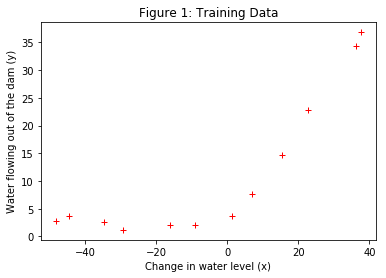

In [3]:
# Plotting training set
#plt.figure(figsize = (5, 5))
plt.plot(X, y, 'r+')
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Figure 1: Training Data")
plt.show()

In [4]:
# Regularized linear regression cost function
def linearRegCostFunction(theta, X, y, lam):
    m = y.size
    x = np.hstack((np.ones((m,1)), X))
    h = np.dot(theta, x.T)
    regJ = (1/(2*m))*np.sum((h - y)**2) + (lam/(2*m))*np.sum(theta[1:]**2) # 注意：theta[0]不要正则化
    return regJ

In [5]:
lam = 1
initial_theta = np.array([1, 1])
linearRegCostFunction(initial_theta, X, y, lam)

303.9931922202643

In [34]:
# Regularized linear regression gradient
def linearRegGradient(theta, X, y, lam):
    m = y.size
    x = np.hstack((np.ones((m,1)), X))
    h = np.dot(theta, x.T)
    grad = (1/m)*np.dot((h - y), x)
    grad[1:] = grad[1:] + (lam/m)*theta[1:]
    return grad

In [7]:
linearRegGradient(initial_theta, X, y, lam)

array([-15.30301567, 598.25074417])

In [133]:
# Fitting linear regression
def trainLinearReg(X, y, lam):
    theta = np.zeros(X.shape[1]+1)
    result = op.minimize(fun = linearRegCostFunction, x0 = theta, args = (X, y, lam), method = 'TNC', jac = linearRegGradient)
    return result.x

In [134]:
theta = trainLinearReg(X, y, 0)
theta

array([13.08790351,  0.36777923])

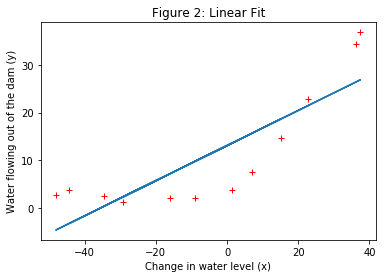

In [135]:
# Plotting linear fit
m = y.size
x = np.hstack((np.ones((m,1)), X))
h = np.dot(theta, x.T)

#plt.figure(figsize = (5, 5))
plt.plot(X, y, 'r+', X, h)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Figure 2: Linear Fit")
plt.show()

### 2  Bias-variance
- **2.1 Learning curves**


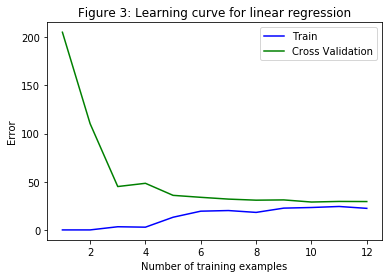

In [226]:
# Plotting Linear regression learning curves
size = [i for i in range(1, m+1)]  # or list(range(2, m+1, 2))
error_train = []
error_val = []
for i in size:
    theta = trainLinearReg(X[:i, :], y[:i], 0)
    '''
    x_train = np.hstack((np.ones((i,1)), X[:i, :]))
    h_train = np.dot(theta, x_train.T)
    x_val = np.hstack((np.ones((yval.size, 1)), Xval))
    h_val = np.dot(theta, x_val.T)
    error_train.append((1/(2*i))*np.sum((h_train - y[:i])**2))
    error_val.append((1/(2*yval.size))*np.sum((h_val - yval)**2))
    '''
    error_train.append(linearRegCostFunction(theta, X[:i, :], y[:i], 0))
    error_val.append(linearRegCostFunction(theta, Xval, yval, 0))
    
#plt.figure("Figure 3: Linear regression learning curve")
plt.plot(size, error_train, 'b', size, error_val, 'g')
plt.title('Figure 3: Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

### 3 Polynomial regression
- ** 3.1 Learning Polynomial Regression**
- ** 3.2 Adjusting the regularization parameter**
- ** 3.3 Selecting λ using a cross validation set**
- ** 3.4 Computing test set error**
- ** 3.5 Plotting learning curves with randomly selected examples**

In [51]:
# Learning Polynomial Regression
# Map polymomial features
def polyFeatures(X, p):
    X_poly = X
    for i in range(2, p+1):
        X_poly = np.hstack((X_poly, X**i))
    return X_poly

In [176]:
# Feature normalization/scaling (z-score normalization: 零均值规范化/标准化)
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [185]:
# Polynomial Regression Fit
def polyFit(X, y, lam):
    m = np.size(X, axis = 0)
    X_poly = polyFeatures(X, 8)
    X_norm, mu, sigma = featureNormalize(X_poly)
    theta_poly = trainLinearReg(X_norm, y, lam)
    return theta_poly, mu, sigma

In [199]:
# Plotting polynomial fit(lambda = 0)
def plotPolyFit(X, y, lam):
    theta_poly, mu, sigma = polyFit(X, y, lam)
    x = np.linspace(X.min()-15, X.max()+15, 100).reshape(100,1)
    x_poly = polyFeatures(x, 8)
    x_norm = (x_poly - mu)/sigma    # 特别注意：这里的mu, sigma是training set中的mu, sigma，不要再调用featureNormalize函数
    x_norm = np.hstack((np.ones((100,1)), x_norm))
    h_poly = np.dot(theta_poly, x_norm.T)

    plt.plot(X, y, 'r+', x, h_poly, 'b')
    plt.xlabel("Change in water level (x)")
    plt.ylabel("Water flowing out of the dam (y)")
    plt.title("Figure 4: Polynomial fit (p = 8, λ = {})".format(lam))
    plt.show()

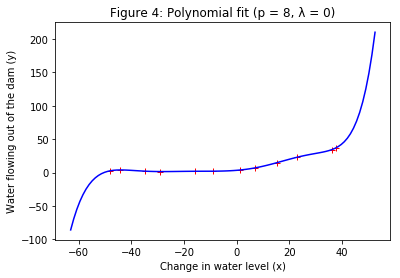

In [200]:
plotPolyFit(X, y, lam = 0)

In [252]:
# Polynomial Regression Learning Curve
def polyLearningCurve(X, y, Xval, yval, lam):
    p = 8
    size = [i for i in range(2, X.shape[0]+1)]
    error_train = []
    error_val = []
    for i in size:
        theta_poly, mu, sigma = polyFit(X[:i, :], y[:i], lam)
        X_poly = polyFeatures(X[:i,:], p)
        X_norm = (X_poly - mu)/sigma
        Xval_poly = polyFeatures(Xval, p)
        Xval_norm = (Xval_poly - mu)/sigma
        # 特别注意：求误差时要去掉lambda正则化那一项，参数lam要一直置0
        error_train.append(linearRegCostFunction(theta_poly, X_norm, y[:i], 0))
        error_val.append(linearRegCostFunction(theta_poly, Xval_norm, yval, 0))
    #print(error_train, error_val)
    
    plt.plot(size, error_train, 'b', size, error_val, 'g')
    plt.title('Figure 5: Polynomial learning curve (p = 8, λ = {})'.format(lam))
    plt.legend(['Train', 'Cross Validation'])
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.show()

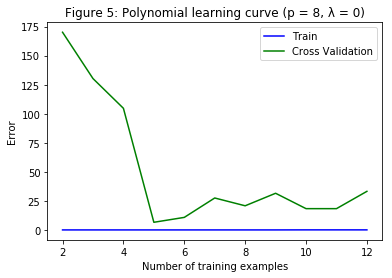

In [253]:
polyLearningCurve(X, y, Xval, yval, lam = 0)

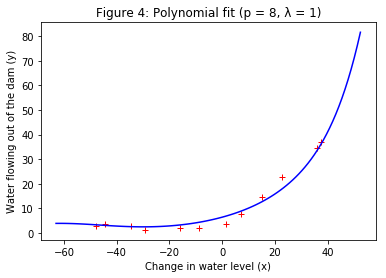

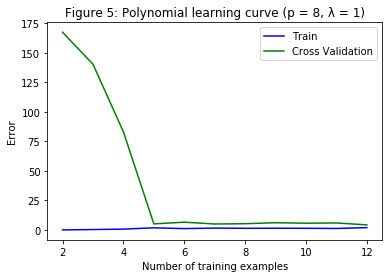

In [254]:
# Polynomial Regression Fit (lambda = 1.000000)
plotPolyFit(X, y, lam = 1)
polyLearningCurve(X, y, Xval, yval, lam = 1)

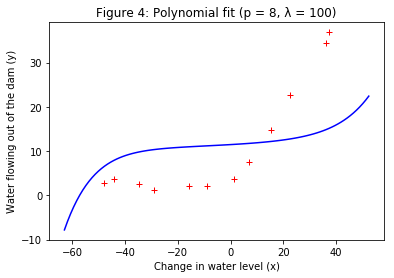

In [255]:
plotPolyFit(X, y, lam = 100)

In [258]:
# Selecting λ using a cross validation set
def validationCurve(X, y, Xval, yval):
    p = 8
    lam = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = []
    error_val = []
    for i in lam:
        theta_poly, mu ,sigma = polyFit(X, y, i)
        X_poly = polyFeatures(X, p)
        X_norm = (X_poly - mu)/sigma
        Xval_poly = polyFeatures(Xval, p)
        Xval_norm = (Xval_poly - mu)/sigma
        # 特别注意：求误差时要去掉lambda正则化那一项，参数lam要一直置0
        error_train.append(linearRegCostFunction(theta_poly, X_norm, y, 0))
        error_val.append(linearRegCostFunction(theta_poly, Xval_norm, yval, 0))
        
    plt.plot(lam, error_train, 'b', lam, error_val, 'g')
    plt.title('Figure 9: Selecting λ using a cross validation set')
    plt.legend(['Train', 'Cross Validation'])
    plt.xlabel('lambdas')
    plt.ylabel('Error')
    plt.show()

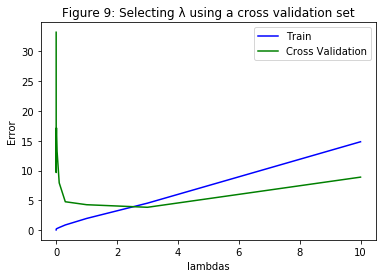

In [259]:
validationCurve(X, y, Xval, yval)

In [261]:
# Computing test set error (λ= 3)
theta_poly, mu ,sigma = polyFit(X, y, lam = 3)
Xtest_poly = polyFeatures(Xtest, p = 8)
Xtest_norm = (Xtest_poly - mu)/sigma
# 特别注意：求误差时要去掉lambda正则化那一项，参数lam要一直置0
error_test = linearRegCostFunction(theta_poly, Xtest_norm, ytest, 0)
print(error_test)

3.572043536159138


In [ ]:
# Plotting learning curves with randomly selected examples
